This Process is divideded into the tow, the first part is extracting imgary from (sentinel 2A 10meter reolution imagery from sentinel data uisng the element api through the pystac system. pystac will be used to access the data catalogues, the scene ofthe data data needed will be download, imagery will be rpocessed uisng gdal and numpy)

After this the iage will be stack into abnds of layers, then we will conduct an unsupervised clasisifcaiton suign he k-means algorithm in the sklearn libraries to classififed out data into 7 classes

Extract Imagery using Pystac

K-MEANS

K-Means Clustering is an Unsupervised Machine Learning algorithm, which groups the unlabeled dataset into different clusters.

Unsupervised Machine Learning is the process of teaching a computer to use unlabeled, unclassified data and enabling the algorithm to operate on that data without supervision. Without any previous data training, the machine’s job in this case is to organize unsorted data according to parallels, patterns, and variations.

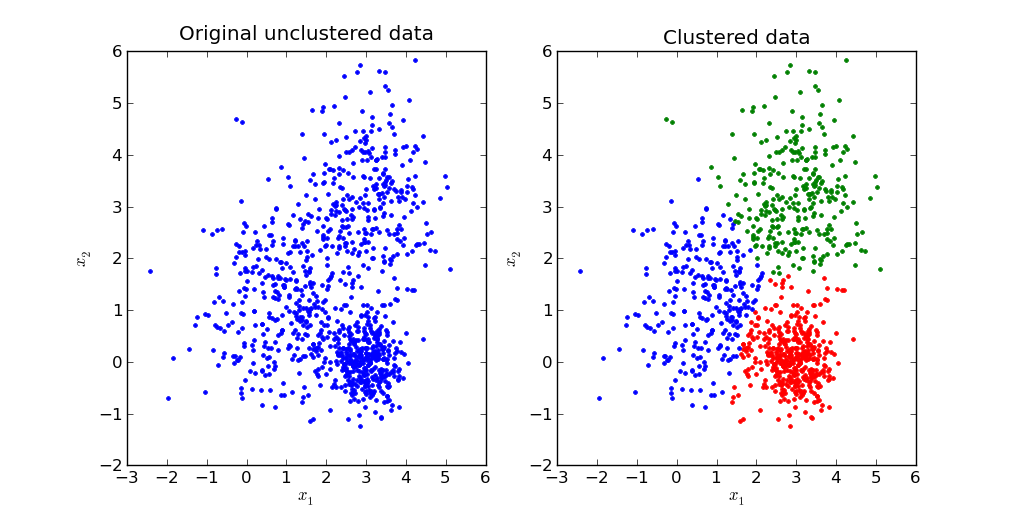

In [1]:
# import all the required libaries
import os
import numpy as np
from osgeo import gdal
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

# ignore warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
# se the image path
image_path = r"C:\Users\Admin\Desktop\mini_projects\geoai\rgb_image.tif"
# set an output driver for geotiff
driverTiff = gdal.GetDriverByName('GTiff')
# open image uisng gdal 
image_dataset = gdal.Open(image_path)
# get the total number of band counts
nbands = image_dataset.RasterCount
# create an empy numpy array with the dimensiton of the image
data = np.empty((image_dataset.RasterXSize*image_dataset.RasterYSize, nbands))

In [3]:
# get the shape of the empty array
data.shape

(2746844, 4)

In [4]:
for i in range(1,nbands+1):
    band = image_dataset.GetRasterBand(i).ReadAsArray()
    data[:,i-1] = band.flatten()

<AxesSubplot: >

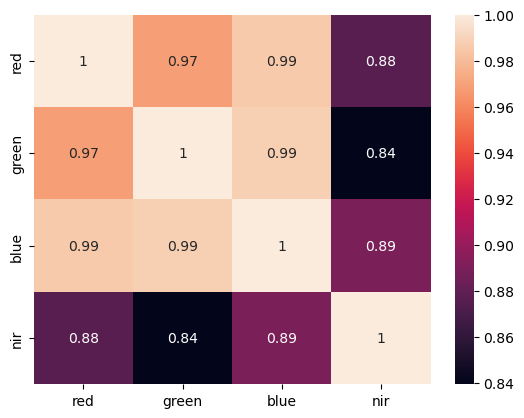

In [5]:
df = pd.DataFrame(data, columns =['red','green','blue','nir'])
sns.heatmap(df.corr(),annot=True)

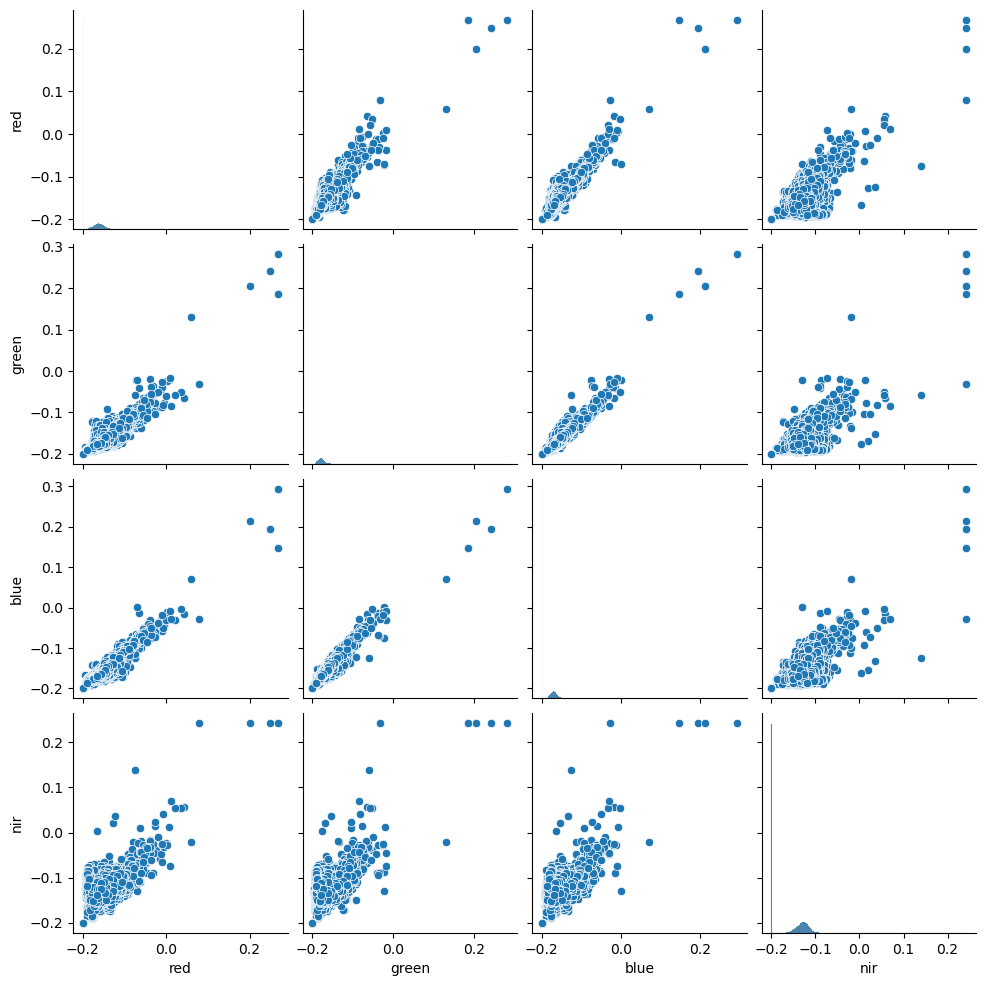

In [12]:
sns.pairplot(df.sample(500000));

In [13]:
km = KMeans(n_clusters=5, random_state=42, max_iter=500)
km.fit(data)
km.predict(data)

array([0, 0, 0, ..., 3, 3, 3])

Save data output

In [14]:
out_data = km.labels_.reshape((image_dataset.RasterYSize, image_dataset.RasterXSize))

In [15]:
# use gdal to save final data
classified_data = driverTiff.Create('unsupervsied_classified.tiff',
                                    image_dataset.RasterXSize, 
                                    image_dataset.RasterYSize,1,gdal.GDT_Float32)


classified_data.SetGeoTransform(image_dataset.GetGeoTransform())
classified_data.SetProjection(image_dataset.GetProjection())
classified_data.GetRasterBand(1).SetNoDataValue(-9999.0)
classified_data.
classified_data.GetRasterBand(1).WriteArray(out_data)
classified_data=None

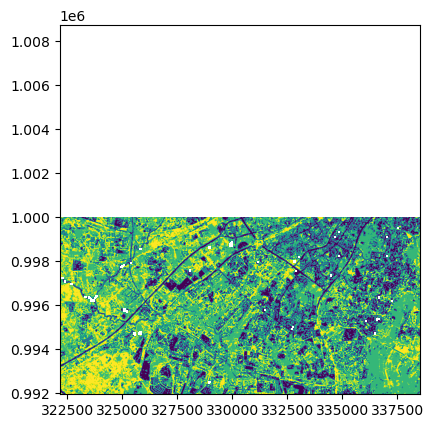

<AxesSubplot: >

In [19]:
import rasterio
import rasterio.plot
import numpy as np

# Open the raster file
output_image = rasterio.open('unsupervsied_classified.tiff')

# Read the raster data as a NumPy array
raster_data = output_image.read(1)  

# Mask values less than or equal to 1
masked_data = np.where(raster_data !=0, raster_data, np.nan)

# Plot the masked raster
rasterio.plot.show(masked_data, transform=output_image.transform, cmap='viridis')

https://www.geeksforgeeks.org/k-means-clustering-introduction/
https://towardsdatascience.com/unsupervised-land-cover-classification-with-python-8e3734dc3c6d
https://www.simplilearn.com/tutorials/machine-learning-tutorial/k-means-clustering-algorithm
https://towardsdatascience.com/unsupervised-learning-k-means-clustering-27416b95af27
https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/